In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math

Cd = 0.04
A = 0.01
m = 5000
R = 6.378 * 1e6
Tc = 1e9
Ta = 300
kT = (Tc-Ta)/R
M = 0.028964
Rgas = 8.3144
p0 = 1.225

def gravidade(y):
    
    dTerra = 5500 #kg/m3 densidade da terra
    
    G = 6.67408 * 1e-11
    
    return G*dTerra*(4/3)*math.pi*y

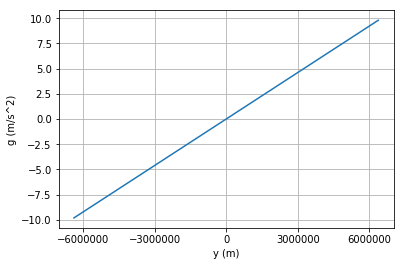

In [2]:
listag=np.arange(-R,R+R/100,R/100)
for k in listag:
    sol=gravidade(listag)

plt.plot(listag,sol)
plt.xlabel("y (m)")
plt.ylabel("g (m/s^2)")
plt.xticks([-6*1e6,-3*1e6,0,3*1e6,6*1e6])
plt.grid(True)
plt.show()

<center><h1> Sem resistência do ar </h1> </center>

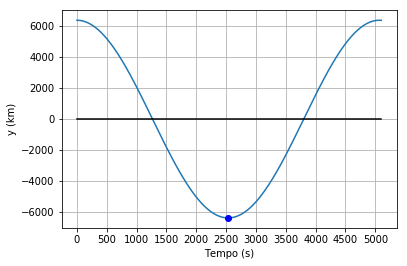

Tempo pelo modelo: 2533.54
Tempo ideal: 2530.5


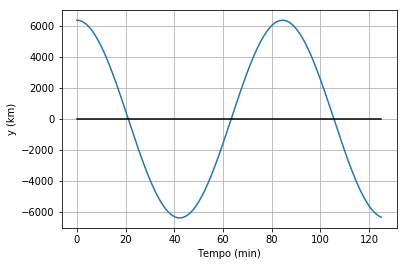

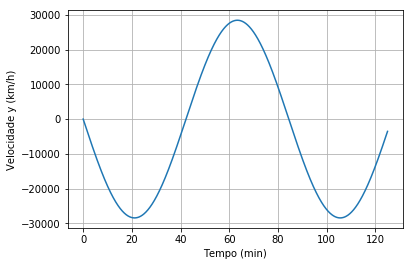

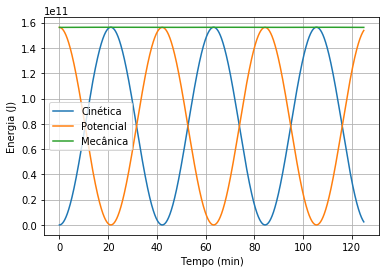

In [3]:
def EqDifSR(lissol,t):
    y = lissol[0]
    vy = lissol[1]

    dydt = vy
    
    dvydt = -gravidade(y)
    
    return dydt,dvydt

def tempoinc(ltempo,sol):
    cond=True
    inclinacao=0
    i=0
    maxmin=[]
    linc=[0,False,False] # True:positivo,False:negativo

    while i<len(sol)-1:
        
        del linc[0]
        
        inclinacao=sol[i+1]-sol[i]
        
        if inclinacao>0:
            linc.append(True)
        else:
            linc.append(False)
        if linc[len(linc)-1]!=linc[len(linc)-2]:
            maxmin.append(i)
        i+=1
    
    pontoinc=0
    
    return ltempo[maxmin[pontoinc]]
ltempo=np.arange(0,5100,1e-2)
CI = [R,0]

SolSR = odeint(EqDifSR,CI,ltempo)

tempo_queda=tempoinc(ltempo,SolSR[:,0])

plt.plot(ltempo,SolSR[:,0]/1000)
plt.plot([0,max(ltempo)],[0,0],'black')
plt.grid(True)
plt.xticks(np.arange(0,5500+1,500))
plt.plot(tempo_queda,min(SolSR[:,0])/1000,'bo')# ponto minimo
plt.ylabel("y (km)")
plt.xlabel("Tempo (s)")
plt.show()

print("Tempo pelo modelo: {}".format(tempo_queda))

print("Tempo ideal: {}".format(2530.5))

Ti=np.arange(0,7500,1e-2)

SolSR2 = odeint(EqDifSR,CI,Ti)
plt.plot(Ti/60,SolSR2[:,0]/1000)
plt.plot([0,max(Ti)/60],[0,0],'black')
plt.grid(True)
plt.ylabel("y (km)")
plt.xlabel("Tempo (min)")
plt.show()

plt.plot(Ti/60,SolSR2[:,1]*3.6)
plt.ylabel("Velocidade y (km/h)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.show()

Epot = []
Ecin = []
Emec = []

for y,vy,i in zip(SolSR2[:,0],SolSR2[:,1],range(len(SolSR2[:,0]))):
    Epot.append(m*(y*9.8/R)/2*y)
    Ecin.append((m*vy**2)/2)
    Emec.append(Ecin[i]+Epot[i])


plt.plot(Ti/60,Ecin,label='Cinética')
plt.plot(Ti/60,Epot,label='Potencial')
plt.plot(Ti/60,Emec,label='Mecânica')
plt.ylabel("Energia (J)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.legend()
plt.show()

<center><h1> Com resistência do ar: densidade constante </h1> </center>

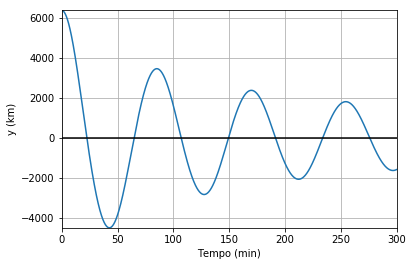

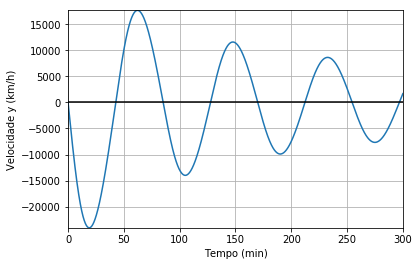

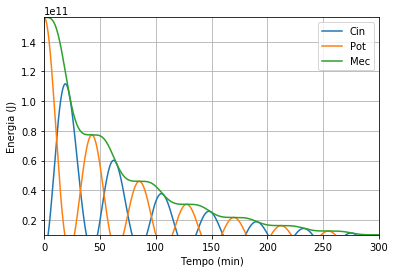

In [4]:
def EqDifDC(lissol,t):
    y = lissol[0]
    vy = lissol[1]
    
    dydt = vy
    
    if vy<0:
        dvydt = -gravidade(y) + (p0*A*Cd*(1/2)*vy**2)/m
    else:
        dvydt = -gravidade(y) + -(p0*A*Cd*(1/2)*vy**2)/m

    return dydt,dvydt

Ti = np.arange(0,300*60,1)

CI = [R,0]

SolDC = odeint(EqDifDC,CI,Ti)


EpotDC=[]
EcinDC=[]
EmecDC=[]
for y,vy,i in zip(SolDC[:,0],SolDC[:,1],range(len(SolDC[:,0]))):
    EpotDC.append(m*(y*gravidade(R)/R)/2*y)
    EcinDC.append((m*vy**2)/2)
    EmecDC.append(EcinDC[i]+EpotDC[i])


plt.plot(Ti/60,SolDC[:,0]/1000)
plt.plot([0,max(Ti)/60],[0,0],'black')
plt.ylabel("y (km)")
plt.xlabel("Tempo (min)")
plt.axis([0,max(Ti)/60,min(SolDC[:,0])/1000,max(SolDC[:,0])/1000])
plt.grid(True)
plt.show()

plt.plot(Ti/60,SolDC[:,1]*3.6)
plt.plot([0,max(Ti)/60],[0,0],'black')
plt.ylabel("Velocidade y (km/h)")
plt.xlabel("Tempo (min)")
plt.axis([0,max(Ti)/60,min(SolDC[:,1])*3.6,max(SolDC[:,1])*3.6])
#plt.yticks(np.arange(-9*1e3,max(SolDC[:,1])*3.6,1000))
plt.grid(True)
plt.show()

plt.plot(Ti/60,EcinDC,label='Cin')
plt.plot(Ti/60,EpotDC,label='Pot')
plt.plot(Ti/60,EmecDC,label='Mec')
plt.ylabel("Energia (J)")
plt.xlabel("Tempo (min)")
plt.axis([0,300,min(EmecDC),max(EmecDC)])
plt.grid(True)
plt.legend()

plt.show()

<center><h3> Fórmulas para a densidade do ar nas diferentes camadas da Terra </h3> </center>

In [5]:
camadas=[35,700,2885,5155,6378]

for i in range(len(camadas)):
    camadas[i]*=1000

medcamadas=[camadas[0]/2]
for i in range(len(camadas)-1):
    medcamadas.append(((camadas[i+1]-camadas[i])/2+camadas[i]))

gravcamadas=[]
for i in range(len(medcamadas)):
    medcamadas[i]=R-medcamadas[i]
    gravcamadas.append(gravidade(medcamadas[i]))

hcamadas=[35000]
for i in range(len(camadas)-1):
    hcamadas.append(camadas[i+1]-camadas[i])

tempcamadas=[573.15,873.15,1073.15,5523.15,5700]

pressaocamadas=[101325]

densidadecamadas=[]

for i in range(5):
    densidade = pressaocamadas[i]/(287.05*tempcamadas[i])
    densidadecamadas.append(densidade)
    pressaocamadas.append(pressaocamadas[i]+densidade*gravcamadas[i]*hcamadas[i])
#print(pressaocamadas)
#print(densidadecamadas)
    
def cam(y):
    y=abs(R-y)
    for i in range(len(camadas)):
        if y<=camadas[i]:
            break
    return i

def gravcam(y):
    return gravcamadas[cam(y)]

def densidadear(y):
    return densidadecamadas[cam(y)]

def Rar(y,Vy):
    return densidadear(y)*Vy**2*1*Cd/2

<center><h1> Com resistência do ar: densidade variando </h1> </center>

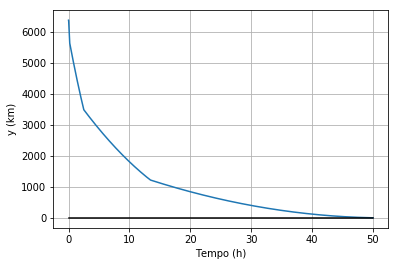

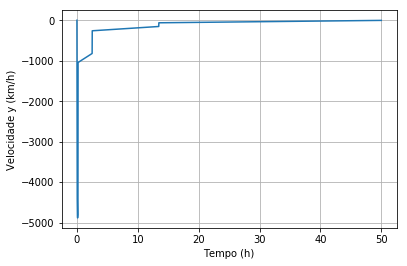

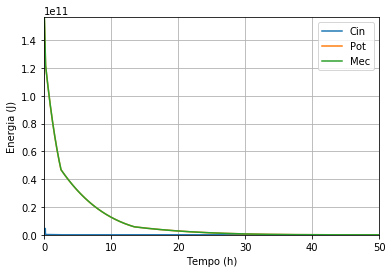

In [6]:
def EqDifDV(lissol,t):
    y = lissol[0]
    vy = lissol[1]
    
    dydt = vy
    
    if vy<0:
        dvydt = -gravidade(y) + Rar(y,vy)/m
    else:
        dvydt = -gravidade(y) + -Rar(y,vy)/m

    return dydt,dvydt

Ti = np.arange(0,3600*50,1)

CI = [R,0]

SolDV = odeint(EqDifDV,CI,Ti)


EpotDV=[]
EcinDV=[]
EmecDV=[]
for y,vy,i in zip(SolDV[:,0],SolDV[:,1],range(len(SolDV[:,0]))):
    EpotDV.append(m*(y*gravidade(R)/R)/2*y)
    EcinDV.append((m*vy**2)/2)
    EmecDV.append(EcinDV[i]+EpotDV[i])


plt.plot(Ti/3600,SolDV[:,0]/1000)
plt.plot([0,max(Ti)/3600],[0,0],'black')
plt.ylabel("y (km)")
plt.xlabel("Tempo (h)")
plt.grid(True)
plt.show()

plt.plot(Ti/3600,SolDV[:,1]*3.6)
plt.ylabel("Velocidade y (km/h)")
plt.xlabel("Tempo (h)")
plt.grid(True)
plt.show()

plt.plot(Ti/3600,EcinDV,label='Cin')
plt.plot(Ti/3600,EpotDV,label='Pot')
plt.plot(Ti/3600,EmecDV,label='Mec')
plt.ylabel("Energia (J)")
plt.xlabel("Tempo (h)")
plt.axis([0,50,min(EmecDV),max(EmecDV)])
plt.grid(True)
plt.legend()
plt.show()

<center><h1> Conclusão </h1> </center>

In [7]:
def dist_porcento(ltempo,sol):
    cond=True
    inclinacao=0
    i=0
    maxmin=[]
    linc=[0,False,False] # True:positivo,False:negativo

    while i<len(sol)-1:
        
        del linc[0]
        
        inclinacao=sol[i+1]-sol[i]
        
        if inclinacao>0:
            linc.append(True)
        else:
            linc.append(False)
        if linc[len(linc)-1]!=linc[len(linc)-2]:
            maxmin.append(i)
        i+=1
    
    pontoinc=0

    try:
        pm=sol[maxmin[pontoinc]]
    except:
        pm=min(sol)
    
    if pm<=0:
        pm=abs(pm)
    else:
        return 0
    
    return 100*pm/R

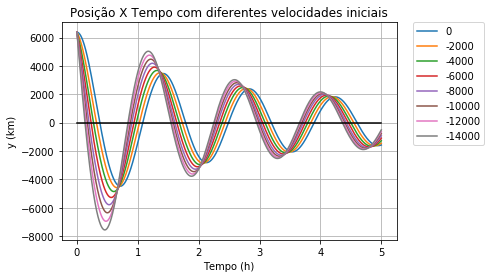

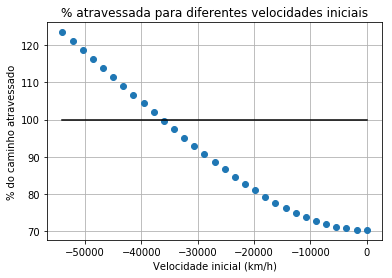

In [8]:
ltc = np.arange(0,300*60,1)

vels=np.arange(0,15000+500,500)
vels=[-i for i in vels]

porcs=[]

for vi in vels:
    CI = [R,vi]
    SolDC = odeint(EqDifDC,CI,ltc)
    if vi%2000==0:
        plt.plot(ltc/3600,SolDC[:,0]/1000,label=vi)
    porcs.append(dist_porcento(ltc,SolDC[:,0]))
plt.plot([min(ltc)/3600,max(ltc)/3600],[0,0],'k')
plt.xlabel("Tempo (h)")
plt.ylabel("y (km)")
plt.grid(True)
plt.title("Posição X Tempo com diferentes velocidades iniciais")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

vels=[i*3.6 for i in vels]

plt.plot(vels,porcs,'o')
plt.title("% atravessada para diferentes velocidades iniciais")
plt.grid(True)
plt.ylabel("% do caminho atravessado")
plt.xlabel("Velocidade inicial (km/h)")
plt.plot([min(vels),max(vels)],[100,100],'k')
plt.show()



<center><h1> Sem resistência do ar </h1> </center>

In [10]:
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation

%matplotlib qt5

#obtém as soluções do ODEINT
sollong=SolSR[:,0]
solc=[]

for k in range(0,len(sollong),1000): # diminuindo a lista de solução para a animação não ficar parada
    solc.append(sollong[k])

yt=solc

#determina o tamanho da figura e iguala as escalas x e y
fig = plt.figure(figsize=(18,18), facecolor='gray')
plt.axis('equal')

ax = fig.add_subplot(111)
#dimensão dos eixos
ax.set_xlim(-R*1.1, R*1.1)
ax.set_ylim(-R*1.1, R*1.1)
ax.set_facecolor('black') 

#especificando as posições iniciais, tamanho e cor das figuras
camadasanim=[R-i for i in camadas]

Terra = patches.Circle((0, 0), R, fc='aqua')
Crust = patches.Circle((0, 0), R-camadasanim[0], fc='darkgray')
UM = patches.Circle((0, 0), camadasanim[0], fc='red')
LM = patches.Circle((0, 0), camadasanim[1], fc='coral')
OC = patches.Circle((0, 0), camadasanim[2], fc='orange')
IC = patches.Circle((0, 0), camadasanim[3], fc='yellow')
Objeto = patches.Circle((1, 0), R/50, fc='blue')
Rect = patches.Rectangle((-R/25,-R), 2*R/25, 2*R, angle=0.0,fc='gray')

def init():
    #inclui as figuras que serão desenhadas
    ax.add_patch(Terra)
    
    ax.add_patch(Crust)
    
    ax.add_patch(UM)
    
    ax.add_patch(LM)
    
    ax.add_patch(OC)
    
    ax.add_patch(IC)
    
    ax.add_patch(Rect)
    
    ax.add_patch(Objeto)

    return None

def animate(i):
    Objeto.center=(0, yt[i]) 
    return None


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(solc), interval=30, blit=False)
plt.show()

C:\Users\rafa_\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<center><h1> Com resistência do ar: densidade constante </h1> </center>

In [11]:
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation

%matplotlib qt5

Ti = np.arange(0,300*60,1)
SolDC = odeint(EqDifDC,[R,0],Ti)

#obtém as soluções do ODEINT
sollong=SolDC[:,0]
solc=[]

for k in range(0,len(sollong),75): # diminuindo a lista de solução para a animação não ficar parada
    solc.append(sollong[k])

yt=solc

#determina o tamanho da figura e iguala as escalas x e y
fig = plt.figure(figsize=(18,18), facecolor='gray')
plt.axis('equal')

ax = fig.add_subplot(111)
#dimensão dos eixos
ax.set_xlim(-R*1.1, R*1.1)
ax.set_ylim(-R*1.1, R*1.1)
ax.set_facecolor('black') 

#especificando as posições iniciais, tamanho e cor das figuras
camadasanim=[R-i for i in camadas]

Terra = patches.Circle((0, 0), R, fc='aqua')
Crust = patches.Circle((0, 0), R-camadasanim[0], fc='darkgray')
UM = patches.Circle((0, 0), camadasanim[0], fc='red')
LM = patches.Circle((0, 0), camadasanim[1], fc='coral')
OC = patches.Circle((0, 0), camadasanim[2], fc='orange')
IC = patches.Circle((0, 0), camadasanim[3], fc='yellow')
Objeto = patches.Circle((1, 0), R/50, fc='blue')
Rect = patches.Rectangle((-R/25,-R), 2*R/25, 2*R, angle=0.0,fc='gray')

def init():
    #inclui as figuras que serão desenhadas
    ax.add_patch(Terra)
    
    ax.add_patch(Crust)
    
    ax.add_patch(UM)
    
    ax.add_patch(LM)
    
    ax.add_patch(OC)
    
    ax.add_patch(IC)
    
    ax.add_patch(Rect)
    
    ax.add_patch(Objeto)

    return None

def animate(i):
    Objeto.center=(0, yt[i]) 
    return None


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(solc), interval=30, blit=False)
plt.show()

C:\Users\rafa_\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<center><h1> Com resistência do ar: densidade variando </h1> </center>

In [12]:
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation

%matplotlib qt5

#obtém as soluções do ODEINT
sollong=SolDV[:,0]
solc=[]

for k in range(0,len(sollong),100): # diminuindo a lista de solução para a animação não ficar parada
    solc.append(sollong[k])

yt=solc

#determina o tamanho da figura e iguala as escalas x e y
fig = plt.figure(figsize=(18,18), facecolor='gray')
plt.axis('equal')

ax = fig.add_subplot(111)
#dimensão dos eixos
ax.set_xlim(-R*1.1, R*1.1)
ax.set_ylim(-R*1.1, R*1.1)
ax.set_facecolor('black') 

#especificando as posições iniciais, tamanho e cor das figuras
camadasanim=[R-i for i in camadas]

Terra = patches.Circle((0, 0), R, fc='aqua')
Crust = patches.Circle((0, 0), R-camadasanim[0], fc='darkgray')
UM = patches.Circle((0, 0), camadasanim[0], fc='red')
LM = patches.Circle((0, 0), camadasanim[1], fc='coral')
OC = patches.Circle((0, 0), camadasanim[2], fc='orange')
IC = patches.Circle((0, 0), camadasanim[3], fc='yellow')
Rect = patches.Rectangle((-R/25,-R), 2*R/25, 2*R, angle=0.0,fc='gray')
Objeto = patches.Circle((1, 0), R/50, fc='blue')

def init():
    #inclui as figuras que serão desenhadas
    ax.add_patch(Terra)
    
    ax.add_patch(Crust)
    
    ax.add_patch(UM)
    
    ax.add_patch(LM)
    
    ax.add_patch(OC)
    
    ax.add_patch(IC)
    
    ax.add_patch(Rect)
    
    ax.add_patch(Objeto)

    return None

def animate(i):
    Objeto.center=(0, yt[i]) 
    return None


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(solc), interval=30, blit=False)
plt.show()

C:\Users\rafa_\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
